# Pré-processamento

In [ ]:
import pandas as pd
import numpy as np

# # Desinstale o numpy atual
# %pip uninstall -y numpy

# # Instale uma versão compatível do numpy
# %pip install numpy==1.25.2

# # Instale os pacotes necessários
# %pip install sentence-transformers imbalanced-learn matplotlib


In [ ]:
df = pd.read_csv('procedimentos_drci_unificado.csv')
df.head()

,id_procedimento,nr_registro,an_registro,dt_registro,dt_ocorrencia,tipo_procedimento,naturezas,relato_historico,unidade_responsavel,municipio,...,bairro,cep,latitude_longitude,qtd_envolvidos,envolvidos_resumo,ano_ocorrencia,mes_ocorrencia,dia_ocorrencia,hora_ocorrencia,nome_mes_ocorrencia
0,5855327,111486.0,2022.0,2022-07-18T10:26:40.000Z,2021-01-20 10:00:00+00:00,Boletim de Ocorrência,ESTELIONATO,A noticiante relata que vem recebendo mensagen...,Delegacia de Repressão Aos Crimes de Informática,TERESINA,...,NaN,NaN,"-5.0726032, -42.8169112",2,"Leidiane Pereira de Sousa (VÍTIMA, COMUNICANTE...",2021,1,20,10,Janeiro
1,5857243,111603.0,2022.0,2022-07-18T11:31:51.000Z,2022-07-13 09:30:00+00:00,Boletim de Ocorrência,ESTELIONATO,A noticiante relata que no intuito de comprar ...,Delegacia de Repressão Aos Crimes de Informática,TERESINA,...,NaN,NaN,"-5.096124199999999, -42.8023065",2,Desconhecido 1 (SUPOSTO AUTOR/INFRATOR) # Jess...,2022,7,13,9,Julho
2,5857775,111603.0,2022.0,2022-07-18T11:55:20.000Z,2022-07-13 09:30:00+00:00,Boletim de Ocorrência,ESTELIONATO,A noticiante relata que no intuito de comprar ...,Delegacia de Repressão Aos Crimes de Informática,TERESINA,...,Nova Brasilia,NaN,"-5.096124199999999, -42.8023065",2,Desconhecido 1 (SUPOSTO AUTOR/INFRATOR) # Jess...,2022,7,13,9,Julho
3,4627965,34224.0,2022.0,2022-03-03T11:00:37.000Z,2022-03-03 11:01:00+00:00,Boletim de Ocorrência,ESTELIONATO,Que a vítima compareceu a esta Delegacia Espec...,Delegacia de Repressão Aos Crimes de Informática,TERESINA,...,NaN,NaN,"-5.0107715, -42.8220098",2,"Maria Jose Gomes de Sousa (VÍTIMA, COMUNICANTE...",2022,3,3,11,Março
4,5858657,111702.0,2022.0,2022-07-18T12:46:55.000Z,2022-07-14 11:30:00+00:00,Boletim de Ocorrência,AMEAÇA,A Noticiante relatar que seu esposo passou cód...,Delegacia de Repressão Aos Crimes de Informática,TERESINA,...,NaN,NaN,"-5.0528333, -42.8113176",2,Desconhecido 1 (SUPOSTO AUTOR/INFRATOR) # Jaqu...,2022,7,14,11,Julho


In [ ]:
df_llm = df.copy()
colunas = ['naturezas', 'relato_historico']
df_llm = df_llm[colunas]
df_llm

,naturezas,relato_historico
0,ESTELIONATO,A noticiante relata que vem recebendo mensagen...
1,ESTELIONATO,A noticiante relata que no intuito de comprar ...
2,ESTELIONATO,A noticiante relata que no intuito de comprar ...
3,ESTELIONATO,Que a vítima compareceu a esta Delegacia Espec...
4,AMEAÇA,A Noticiante relatar que seu esposo passou cód...
...,...,...
16053,INVASÃO DE DISPOSITIVO INFORMÁTICO,"O comunicante informa que, durante a prática d..."
16054,PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO,O comunicante informa que perdeu sua carteira ...
16055,ESTELIONATO,"O comunicante informa que, ao verificar seu ap..."
16056,ESTELIONATO # FALSA IDENTIDADE,Relata que criminosos criaram uma conta falsa ...


In [ ]:
df_llm_com_hash = df_llm[df_llm['naturezas'].str.contains('#')]
df_llm_com_hash
df_llm_sem_hash = df_llm[~df_llm['naturezas'].str.contains('#')]
df_llm_sem_hash

,naturezas,relato_historico
0,ESTELIONATO,A noticiante relata que vem recebendo mensagen...
1,ESTELIONATO,A noticiante relata que no intuito de comprar ...
2,ESTELIONATO,A noticiante relata que no intuito de comprar ...
3,ESTELIONATO,Que a vítima compareceu a esta Delegacia Espec...
4,AMEAÇA,A Noticiante relatar que seu esposo passou cód...
...,...,...
16052,ESTELIONATO,A comunicante informa que identificou em seu e...
16053,INVASÃO DE DISPOSITIVO INFORMÁTICO,"O comunicante informa que, durante a prática d..."
16054,PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO,O comunicante informa que perdeu sua carteira ...
16055,ESTELIONATO,"O comunicante informa que, ao verificar seu ap..."


In [ ]:
df_work = df_llm_sem_hash.copy()
df_work

,naturezas,relato_historico
0,ESTELIONATO,A noticiante relata que vem recebendo mensagen...
1,ESTELIONATO,A noticiante relata que no intuito de comprar ...
2,ESTELIONATO,A noticiante relata que no intuito de comprar ...
3,ESTELIONATO,Que a vítima compareceu a esta Delegacia Espec...
4,AMEAÇA,A Noticiante relatar que seu esposo passou cód...
...,...,...
16052,ESTELIONATO,A comunicante informa que identificou em seu e...
16053,INVASÃO DE DISPOSITIVO INFORMÁTICO,"O comunicante informa que, durante a prática d..."
16054,PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO,O comunicante informa que perdeu sua carteira ...
16055,ESTELIONATO,"O comunicante informa que, ao verificar seu ap..."


In [ ]:
display(df_work['naturezas'].value_counts().head())

naturezas
ESTELIONATO                                   6579
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO    2145
INVASÃO DE DISPOSITIVO INFORMÁTICO            1610
FALSA IDENTIDADE                               831
EXTORSÃO                                       430
Name: count, dtype: int64

In [ ]:
df_work.to_csv('atv_llm_procedimentos.csv', index=False)

In [ ]:
top5_naturezas = df_work['naturezas'].value_counts().head(5).index
df_top5 = df_work[df_work['naturezas'].isin(top5_naturezas)]
df_top5

,naturezas,relato_historico
0,ESTELIONATO,A noticiante relata que vem recebendo mensagen...
1,ESTELIONATO,A noticiante relata que no intuito de comprar ...
2,ESTELIONATO,A noticiante relata que no intuito de comprar ...
3,ESTELIONATO,Que a vítima compareceu a esta Delegacia Espec...
5,ESTELIONATO,Relata que no intuito de vender um objeto (des...
...,...,...
16052,ESTELIONATO,A comunicante informa que identificou em seu e...
16053,INVASÃO DE DISPOSITIVO INFORMÁTICO,"O comunicante informa que, durante a prática d..."
16054,PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO,O comunicante informa que perdeu sua carteira ...
16055,ESTELIONATO,"O comunicante informa que, ao verificar seu ap..."


In [ ]:
df_top5.to_csv('atv_llm_procedimentos_top5.csv', index=False)

In [ ]:
# Balancear os dados usando undersampling (430 exemplos de cada classe)
from sklearn.utils import resample

# Número de amostras por classe (menor classe)
n_samples = df_top5['naturezas'].value_counts().min()
print(f'Número de amostras por classe após balanceamento: {n_samples}')

# Separar por classe e fazer undersampling
df_balanced_list = []
for classe in df_top5['naturezas'].unique():
    df_classe = df_top5[df_top5['naturezas'] == classe]
    df_classe_resampled = resample(df_classe,
                                    n_samples=n_samples,
                                    random_state=42,
                                    replace=False)
    df_balanced_list.append(df_classe_resampled)

# Juntar tudo e embaralhar
df_balanced = pd.concat(df_balanced_list).sample(frac=1, random_state=42).reset_index(drop=True)

print('\nDistribuição balanceada:')
print(df_balanced['naturezas'].value_counts())
print(f'\nTotal de exemplos: {len(df_balanced)}')

Número de amostras por classe após balanceamento: 430

Distribuição balanceada:
naturezas
FALSA IDENTIDADE                              430
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO    430
EXTORSÃO                                      430
ESTELIONATO                                   430
INVASÃO DE DISPOSITIVO INFORMÁTICO            430
Name: count, dtype: int64

Total de exemplos: 2150


# Fine-tuning de modelo BERT Large
Vamos fazer fine-tuning do BERTimbau-large para classificação de crimes

In [ ]:
# Instalar bibliotecas necessárias
# %pip install transformers torch accelerate datasets scikit-learn

In [ ]:
# Preparando os dados BALANCEADOS para fine-tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch

# Verificar se GPU está disponível
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Codificar as labels usando os dados BALANCEADOS
le = LabelEncoder()
labels_encoded = le.fit_transform(df_balanced['naturezas'])

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['relato_historico'].tolist(),
    labels_encoded,
    test_size=0.2,
    random_state=42,
    stratify=labels_encoded
)

print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')
print(f'Número de classes: {len(le.classes_)}')
print(f'Classes: {le.classes_}')

Usando dispositivo: cuda
Tamanho do conjunto de treino: 1720
Tamanho do conjunto de teste: 430
Número de classes: 5
Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']


In [ ]:
# Instalando PyTorch com CUDA (escolha UMA das opções abaixo)

# OPÇÃO 1 (RECOMENDADA): Instalar via pip com CUDA 11.8
# Descomente as linhas abaixo e execute:
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# OPÇÃO 2: Se o download falhar, tente CUDA 12.1 (mais recente)
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# OPÇÃO 3: Se você usa Conda, use este comando no terminal:
# conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

# Após instalar, reinicie o kernel do notebook e execute a célula de verificação abaixo

In [ ]:
# Verificar instalação do PyTorch com CUDA
import torch

print(f'PyTorch version: {torch.__version__}')
print(f'CUDA disponível: {torch.cuda.is_available()}')
if torch.cuda.is_available():
    print(f'CUDA version: {torch.version.cuda}')
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memória GPU disponível: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB')
    print('\n✅ GPU está pronta para uso!')
else:
    print('\n⚠️ CUDA não está disponível!')
    print('Execute a célula de instalação acima primeiro.')

PyTorch version: 2.5.1+cu121
CUDA disponível: True
CUDA version: 12.1
GPU: NVIDIA GeForce RTX 3060
Memória GPU disponível: 12.00 GB

✅ GPU está pronta para uso!


In [ ]:
# Carregar o modelo BERTimbau-large e tokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = 'neuralmind/bert-large-portuguese-cased'  # BERTimbau-large

print(f'Carregando modelo: {model_name}')

tokenizer = AutoTokenizer.from_pretrained(model_name)
# Forçar uso de safetensors para evitar problema de segurança do torch.load
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(le.classes_),
    use_safetensors=True  # Usar formato safetensors (mais seguro)
).to(device)

print('Modelo carregado com sucesso!')
print(f'Modelo movido para: {device}')

Carregando modelo: neuralmind/bert-large-portuguese-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-large-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo carregado com sucesso!
Modelo movido para: cuda


In [ ]:
# Tokenizar os dados
print('Tokenizando dados...')

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

# Criar Dataset do PyTorch
class CrimeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Garantir que seja long
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CrimeDataset(train_encodings, y_train)
test_dataset = CrimeDataset(test_encodings, y_test)

print('Datasets criados com sucesso!')

Tokenizando dados...
Datasets criados com sucesso!


In [ ]:
# Configurar os argumentos de treinamento
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Função para calcular métricas
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Configurações de treinamento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,  # Ajuste conforme memória GPU
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    fp16=True,  # Usar precisão mista para economizar memória
    report_to='none'
)

print('Argumentos de treinamento configurados!')

Argumentos de treinamento configurados!


In [ ]:
# Criar Trainer e iniciar o treinamento
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

print('Iniciando treinamento...')
print('Isso pode levar alguns minutos (ou horas dependendo dos dados)...')

# Treinar o modelo
trainer.train()

print('Treinamento concluído!')

Iniciando treinamento...
Isso pode levar alguns minutos (ou horas dependendo dos dados)...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.869600,0.639418,0.758140,0.762259,0.777193,0.758140
2,0.441400,0.631568,0.818605,0.816818,0.824887,0.818605
3,0.318500,0.623635,0.823256,0.824727,0.840971,0.823256


Treinamento concluído!


In [ ]:
# Avaliar o modelo no conjunto de teste
print('Avaliando modelo...')
results = trainer.evaluate()

print('\n=== Resultados da Avaliação ===')
for key, value in results.items():
    print(f'{key}: {value:.4f}')

# Salvar o modelo treinado
model.save_pretrained('./modelo_bertimbau_crimes')
tokenizer.save_pretrained('./modelo_bertimbau_crimes')

print('\nModelo salvo em: ./modelo_bertimbau_crimes')

Avaliando modelo...



=== Resultados da Avaliação ===
eval_loss: 0.6236
eval_accuracy: 0.8233
eval_f1: 0.8247
eval_precision: 0.8410
eval_recall: 0.8233
eval_runtime: 219.1879
eval_samples_per_second: 1.9620
eval_steps_per_second: 0.1230
epoch: 3.0000

Modelo salvo em: ./modelo_bertimbau_crimes

Modelo salvo em: ./modelo_bertimbau_crimes


In [ ]:
# Testar o modelo com exemplos
def predict_crime(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(predictions, dim=-1).item()
    confidence = predictions[0][predicted_class].item()

    return le.inverse_transform([predicted_class])[0], confidence

# Teste com alguns exemplos
exemplos = [
    "Vítima relata que foi enganada por golpista que prometeu empréstimo com juros baixos",
    "Vítima informa que perdeu seu documento de identidade no shopping",
    "Vítima relata que teve sua conta de e-mail invadida e mensagens foram enviadas"
]

print('=== Testando o modelo ===\n')
for i, exemplo in enumerate(exemplos, 1):
    crime, confianca = predict_crime(exemplo)
    print(f'Exemplo {i}: {exemplo[:80]}...')
    print(f'Predição: {crime}')
    print(f'Confiança: {confianca:.2%}\n')

=== Testando o modelo ===

Exemplo 1: Vítima relata que foi enganada por golpista que prometeu empréstimo com juros ba...
Predição: ESTELIONATO
Confiança: 45.58%

Exemplo 2: Vítima informa que perdeu seu documento de identidade no shopping...
Predição: PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO
Confiança: 99.69%

Exemplo 1: Vítima relata que foi enganada por golpista que prometeu empréstimo com juros ba...
Predição: ESTELIONATO
Confiança: 45.58%

Exemplo 2: Vítima informa que perdeu seu documento de identidade no shopping...
Predição: PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO
Confiança: 99.69%

Exemplo 3: Vítima relata que teve sua conta de e-mail invadida e mensagens foram enviadas...
Predição: INVASÃO DE DISPOSITIVO INFORMÁTICO
Confiança: 99.31%

Exemplo 3: Vítima relata que teve sua conta de e-mail invadida e mensagens foram enviadas...
Predição: INVASÃO DE DISPOSITIVO INFORMÁTICO
Confiança: 99.31%



In [ ]:
# Carregar o modelo treinado
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Carregar dados para recuperar as classes
df = pd.read_csv('procedimentos_drci_unificado.csv')
df_llm = df[['naturezas', 'relato_historico']]
df_llm_sem_hash = df_llm[~df_llm['naturezas'].str.contains('#')]
df_work = df_llm_sem_hash.copy()
top5_naturezas = df_work['naturezas'].value_counts().head(5).index
df_top5 = df_work[df_work['naturezas'].isin(top5_naturezas)]

# Recriar o LabelEncoder com as mesmas classes
le = LabelEncoder()
le.fit(df_top5['naturezas'])

# Configurar dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Carregar modelo e tokenizer treinados
model_path = './modelo_bertimbau_crimes'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
model.eval()  # Modo de avaliação

print(f'✅ Modelo carregado de: {model_path}')
print(f'Classes: {le.classes_}')

C:\Users\jvict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Usando dispositivo: cuda
✅ Modelo carregado de: ./modelo_bertimbau_crimes
Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']
✅ Modelo carregado de: ./modelo_bertimbau_crimes
Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']


In [ ]:
# Função para fazer predições
def predict_crime(text):
    """
    Classifica um texto de relato de crime

    Args:
        text (str): Texto do relato do crime

    Returns:
        tuple: (classe_predita, confiança)
    """
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(predictions, dim=-1).item()
        confidence = predictions[0][predicted_class].item()

    return le.inverse_transform([predicted_class])[0], confidence

# Teste com exemplos
print('=== Testando o modelo ===\n')

exemplos_teste = [
    "Vítima relata que foi enganada por golpista que prometeu empréstimo com juros baixos",
    "Vítima informa que perdeu seu documento de identidade no shopping",
    "Vítima relata que teve sua conta de e-mail invadida e mensagens foram enviadas",
    "Vítima foi ameaçada e forçada a transferir dinheiro para conta bancária",
    "Vítima compareceu para registrar que alguém está usando seu CPF indevidamente"
]

for i, exemplo in enumerate(exemplos_teste, 1):
    crime, confianca = predict_crime(exemplo)
    print(f'Exemplo {i}:')
    print(f'Texto: {exemplo}')
    print(f'Predição: {crime}')
    print(f'Confiança: {confianca:.2%}\n')

=== Testando o modelo ===

Exemplo 1:
Texto: Vítima relata que foi enganada por golpista que prometeu empréstimo com juros baixos
Predição: ESTELIONATO
Confiança: 45.57%

Exemplo 2:
Texto: Vítima informa que perdeu seu documento de identidade no shopping
Predição: PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO
Confiança: 99.69%

Exemplo 3:
Texto: Vítima relata que teve sua conta de e-mail invadida e mensagens foram enviadas
Predição: INVASÃO DE DISPOSITIVO INFORMÁTICO
Confiança: 99.31%

Exemplo 4:
Texto: Vítima foi ameaçada e forçada a transferir dinheiro para conta bancária
Predição: EXTORSÃO
Confiança: 98.78%

Exemplo 5:
Texto: Vítima compareceu para registrar que alguém está usando seu CPF indevidamente
Predição: FALSA IDENTIDADE
Confiança: 99.05%

Exemplo 1:
Texto: Vítima relata que foi enganada por golpista que prometeu empréstimo com juros baixos
Predição: ESTELIONATO
Confiança: 45.57%

Exemplo 2:
Texto: Vítima informa que perdeu seu documento de identidade no shopping
Predição: PERD

In [ ]:
# Teste seus próprios exemplos aqui!
# Mude o texto abaixo e execute a célula

'''
Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']
'''

seu_texto = "Minha irmã entrou em contato as 16:30 por ligação pra informar que um contato de whatsapp desconhecido para ela mas que estava utilizando minha foto no perfil e meu nome estava solicitando que ela pagasse um boleto em meu nome pois a conta estaria bloqueada. Minha irmã estranhou a situação e pediu que a pessoa enviasse um pix de um conhecido meu pra que soubesse se a história era verdadeira e entao a pessoa enviou uma chave dizendo ser a do pagamento do boleto a que se referia. O banco era Santander e a chave em Nome de Alessandra Paula Lopes de Lisboa chave Pix cpf 121.030.746-45. Nesse momento ela confirmou se tratar de fraude e então me comunicou. O contato era do seguinte numero (86) 98897-7491. Encaminho por anexo o print da mensagem."

crime_predito, confianca = predict_crime(seu_texto)

print('📝 Texto analisado:')
print(f'   {seu_texto}\n')
print(f'🔍 Classificação: {crime_predito}')
print(f'📊 Confiança: {confianca:.2%}')

📝 Texto analisado:
   Minha irmã entrou em contato as 16:30 por ligação pra informar que um contato de whatsapp desconhecido para ela mas que estava utilizando minha foto no perfil e meu nome estava solicitando que ela pagasse um boleto em meu nome pois a conta estaria bloqueada. Minha irmã estranhou a situação e pediu que a pessoa enviasse um pix de um conhecido meu pra que soubesse se a história era verdadeira e entao a pessoa enviou uma chave dizendo ser a do pagamento do boleto a que se referia. O banco era Santander e a chave em Nome de Alessandra Paula Lopes de Lisboa chave Pix cpf 121.030.746-45. Nesse momento ela confirmou se tratar de fraude e então me comunicou. O contato era do seguinte numero (86) 98897-7491. Encaminho por anexo o print da mensagem.

🔍 Classificação: FALSA IDENTIDADE
📊 Confiança: 99.10%


---

# Fine-tuning com XLM-RoBERTa-large
Vamos treinar o XLM-RoBERTa-large para comparar com o BERTimbau

In [ ]:
# Preparar dados balanceados (reusar do treinamento anterior)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch

# Verificar GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Codificar labels
le_xlm = LabelEncoder()
labels_encoded = le_xlm.fit_transform(df_balanced['naturezas'])

# Dividir dados
X_train_xlm, X_test_xlm, y_train_xlm, y_test_xlm = train_test_split(
    df_balanced['relato_historico'].tolist(),
    labels_encoded,
    test_size=0.2,
    random_state=42,
    stratify=labels_encoded
)

print(f'Tamanho do conjunto de treino: {len(X_train_xlm)}')
print(f'Tamanho do conjunto de teste: {len(X_test_xlm)}')
print(f'Número de classes: {len(le_xlm.classes_)}')
print(f'Classes: {le_xlm.classes_}')

Usando dispositivo: cuda
Tamanho do conjunto de treino: 1720
Tamanho do conjunto de teste: 430
Número de classes: 5
Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']


In [ ]:
# Carregar XLM-RoBERTa-large
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name_xlm = 'xlm-roberta-large'

print(f'Carregando modelo: {model_name_xlm}')

tokenizer_xlm = AutoTokenizer.from_pretrained(model_name_xlm)
model_xlm = AutoModelForSequenceClassification.from_pretrained(
    model_name_xlm,
    num_labels=len(le_xlm.classes_)
).to(device)

print('Modelo XLM-RoBERTa-large carregado com sucesso!')
print(f'Modelo movido para: {device}')

Carregando modelo: xlm-roberta-large


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo XLM-RoBERTa-large carregado com sucesso!
Modelo movido para: cuda


In [ ]:
# Tokenizar dados para XLM-RoBERTa
print('Tokenizando dados...')

train_encodings_xlm = tokenizer_xlm(X_train_xlm, truncation=True, padding=True, max_length=512)
test_encodings_xlm = tokenizer_xlm(X_test_xlm, truncation=True, padding=True, max_length=512)

# Criar Dataset
class CrimeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset_xlm = CrimeDataset(train_encodings_xlm, y_train_xlm)
test_dataset_xlm = CrimeDataset(test_encodings_xlm, y_test_xlm)

print('Datasets criados com sucesso!')

Tokenizando dados...
Datasets criados com sucesso!


In [ ]:
# Configurar treinamento para XLM-RoBERTa
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args_xlm = TrainingArguments(
    output_dir='./results_xlm',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_xlm',
    logging_steps=100,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    fp16=True,
    report_to='none'
)

print('Argumentos de treinamento configurados para XLM-RoBERTa!')

Argumentos de treinamento configurados para XLM-RoBERTa!


In [ ]:
# Treinar XLM-RoBERTa
trainer_xlm = Trainer(
    model=model_xlm,
    args=training_args_xlm,
    train_dataset=train_dataset_xlm,
    eval_dataset=test_dataset_xlm,
    compute_metrics=compute_metrics
)

print('Iniciando treinamento do XLM-RoBERTa-large...')
print('Isso pode levar alguns minutos (ou horas dependendo dos dados)...')

# Treinar
trainer_xlm.train()

print('Treinamento do XLM-RoBERTa concluído!')

Iniciando treinamento do XLM-RoBERTa-large...
Isso pode levar alguns minutos (ou horas dependendo dos dados)...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.336300,1.025002,0.609302,0.557345,0.686923,0.609302
2,0.677400,0.841721,0.711628,0.718951,0.762136,0.711628
3,0.681900,0.666913,0.797674,0.798610,0.816651,0.797674


Treinamento do XLM-RoBERTa concluído!


In [ ]:
# Avaliar XLM-RoBERTa no conjunto de teste
print('Avaliando XLM-RoBERTa no conjunto de teste...')
results_xlm = trainer_xlm.evaluate()
print('Resultados XLM-RoBERTa:')
print(f"Acurácia: {results_xlm['eval_accuracy']:.4f}")
print(f"F1 Score: {results_xlm['eval_f1']:.4f}")
print(f"Precisão: {results_xlm['eval_precision']:.4f}")
print(f"Recall: {results_xlm['eval_recall']:.4f}")

# Salvar modelo
output_dir_xlm = './modelo_xlm_crimes'
trainer_xlm.save_model(output_dir_xlm)
tokenizer_xlm.save_pretrained(output_dir_xlm)
print(f'\nModelo XLM-RoBERTa salvo em: {output_dir_xlm}')

Avaliando XLM-RoBERTa no conjunto de teste...


Resultados XLM-RoBERTa:
Acurácia: 0.7977
F1 Score: 0.7986
Precisão: 0.8167
Recall: 0.7977

Modelo XLM-RoBERTa salvo em: ./modelo_xlm_crimes

Modelo XLM-RoBERTa salvo em: ./modelo_xlm_crimes


In [ ]:
# Função para fazer previsões com XLM-RoBERTa
def predict_crime_xlm(texto, model, tokenizer, label_encoder, device='cuda'):
    """
    Faz previsão do crime baseado no texto usando XLM-RoBERTa
    """
    model.eval()

    # Tokenizar
    inputs = tokenizer(
        texto,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    ).to(device)

    # Fazer previsão
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Obter probabilidades
    probs = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_idx = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class_idx].item()

    # Converter índice para label
    predicted_crime = label_encoder.inverse_transform([predicted_class_idx])[0]

    return predicted_crime, confidence

# Testar com alguns exemplos
print('Testando XLM-RoBERTa com exemplos:')
print('-' * 80)

exemplo1 = "Recebi uma mensagem dizendo que ganhei um prêmio e pediram meus dados bancários"
crime1, conf1 = predict_crime_xlm(exemplo1, model_xlm, tokenizer_xlm, le_xlm, device)
print(f'Texto: {exemplo1}')
print(f'Previsão: {crime1} (confiança: {conf1:.2%})')
print('-' * 80)

exemplo2 = "Perdi minha carteira com documentos na rua"
crime2, conf2 = predict_crime_xlm(exemplo2, model_xlm, tokenizer_xlm, le_xlm, device)
print(f'Texto: {exemplo2}')
print(f'Previsão: {crime2} (confiança: {conf2:.2%})')
print('-' * 80)

exemplo3 = "Hackearam minha conta de email e mudaram a senha"
crime3, conf3 = predict_crime_xlm(exemplo3, model_xlm, tokenizer_xlm, le_xlm, device)
print(f'Texto: {exemplo3}')
print(f'Previsão: {crime3} (confiança: {conf3:.2%})')
print('-' * 80)

---

# Validação com Dataset Externo

Agora vamos validar ambos os modelos usando o dataset `dvir_dados_processados.csv` que contém 200 relatos de cada natureza (exceto Extorsão com 35).

In [ ]:
# Carregar dataset de validação
df_validacao = pd.read_csv('dvir_dados_processados.csv')

print('Dataset de Validação:')
print(f'Total de exemplos: {len(df_validacao)}')
print('\nDistribuição por natureza:')
print(df_validacao['natureza_final'].value_counts())
print('\nPrimeiras linhas:')
display(df_validacao.head())

Dataset de Validação:
Total de exemplos: 835

Distribuição por natureza:
natureza_final
ESTELIONATO                                   200
FALSA IDENTIDADE                              200
INVASÃO DE DISPOSITIVO INFORMÁTICO            200
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO    200
EXTORSÃO                                       35
Name: count, dtype: int64

Primeiras linhas:


,natureza_final,Descrição do Fato
0,ESTELIONATO,O número +55 86 98879-1286 criou uma conta no ...
1,ESTELIONATO,"Eu, Francisco Telmo Fortes Meneses, informo qu..."
2,ESTELIONATO,Após atender uma ligação o meu aparelho de cel...
3,ESTELIONATO,Realizei a compra de 3 calçados através do ins...
4,ESTELIONATO,Foi debitado da minha conta bancária da Caixa ...


In [ ]:
# Preparar dados de validação
# Recriar o LabelEncoder com as classes do modelo
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_validacao['natureza_final'].unique())
classes_conhecidas = le.classes_  # ou le_xlm.classes_, são iguais

# Mapear nomes de classes (caso haja pequenas diferenças)
# Verificar se os nomes batem
print('Classes dos modelos:')
for i, classe in enumerate(classes_conhecidas):
    print(f'{i}: {classe}')

print('\nClasses no dataset de validação:')
print(df_validacao['natureza_final'].unique())

# Filtrar apenas registros com classes conhecidas
df_validacao_filtrado = df_validacao[df_validacao['natureza_final'].isin(classes_conhecidas)].copy()

print(f'\nExemplos filtrados: {len(df_validacao_filtrado)} de {len(df_validacao)}')
print('\nDistribuição após filtro:')
print(df_validacao_filtrado['natureza_final'].value_counts())

Classes dos modelos:
0: ESTELIONATO
1: EXTORSÃO
2: FALSA IDENTIDADE
3: INVASÃO DE DISPOSITIVO INFORMÁTICO
4: PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO

Classes no dataset de validação:
['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']

Exemplos filtrados: 835 de 835

Distribuição após filtro:
natureza_final
ESTELIONATO                                   200
FALSA IDENTIDADE                              200
INVASÃO DE DISPOSITIVO INFORMÁTICO            200
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO    200
EXTORSÃO                                       35
Name: count, dtype: int64


In [ ]:
# Carregar os modelos treinados para validação
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

# Verificar GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Carregar BERTimbau
print('\n📦 Carregando BERTimbau-large...')
model_path_bert = './modelo_bertimbau_crimes'
tokenizer = AutoTokenizer.from_pretrained(model_path_bert)
model = AutoModelForSequenceClassification.from_pretrained(model_path_bert).to(device)
model.eval()
print(f'✅ BERTimbau carregado de: {model_path_bert}')

# Carregar XLM-RoBERTa
print('\n📦 Carregando XLM-RoBERTa-large...')
model_path_xlm = './modelo_xlm_crimes'
tokenizer_xlm = AutoTokenizer.from_pretrained(model_path_xlm)
model_xlm = AutoModelForSequenceClassification.from_pretrained(model_path_xlm).to(device)
model_xlm.eval()
print(f'✅ XLM-RoBERTa carregado de: {model_path_xlm}')

# Recriar LabelEncoders com as classes do dataset de validação
le = LabelEncoder()
le.fit(df_validacao['natureza_final'].unique())

le_xlm = LabelEncoder()
le_xlm.fit(df_validacao['natureza_final'].unique())

print(f'\n🏷️  Classes: {le.classes_}')
print(f'\n✅ Ambos os modelos carregados e prontos para validação!')

C:\Users\jvict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Usando dispositivo: cuda

📦 Carregando BERTimbau-large...
✅ BERTimbau carregado de: ./modelo_bertimbau_crimes

📦 Carregando XLM-RoBERTa-large...
✅ BERTimbau carregado de: ./modelo_bertimbau_crimes

📦 Carregando XLM-RoBERTa-large...
✅ XLM-RoBERTa carregado de: ./modelo_xlm_crimes

🏷️  Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']

✅ Ambos os modelos carregados e prontos para validação!
✅ XLM-RoBERTa carregado de: ./modelo_xlm_crimes

🏷️  Classes: ['ESTELIONATO' 'EXTORSÃO' 'FALSA IDENTIDADE'
 'INVASÃO DE DISPOSITIVO INFORMÁTICO'
 'PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO']

✅ Ambos os modelos carregados e prontos para validação!


In [ ]:
# Funções de predição para validação
def predict_crime(texto, model, tokenizer, label_encoder, device='cuda'):
    """
    Faz previsão do crime baseado no texto usando BERTimbau
    """
    model.eval()

    # Tokenizar
    inputs = tokenizer(
        texto,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    ).to(device)

    # Fazer previsão
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Obter probabilidades
    probs = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_idx = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class_idx].item()

    # Converter índice para label
    predicted_crime = label_encoder.inverse_transform([predicted_class_idx])[0]

    return predicted_crime, confidence


def predict_crime_xlm(texto, model, tokenizer, label_encoder, device='cuda'):
    """
    Faz previsão do crime baseado no texto usando XLM-RoBERTa
    """
    model.eval()

    # Tokenizar
    inputs = tokenizer(
        texto,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    ).to(device)

    # Fazer previsão
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Obter probabilidades
    probs = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_idx = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class_idx].item()

    # Converter índice para label
    predicted_crime = label_encoder.inverse_transform([predicted_class_idx])[0]

    return predicted_crime, confidence

print('✅ Funções de predição definidas!')

✅ Funções de predição definidas!


In [ ]:
# Fazer predições com BERTimbau em todo o dataset de validação
from tqdm.auto import tqdm

print('Fazendo predições com BERTimbau...')
predicoes_bert = []
confiancas_bert = []

for texto in tqdm(df_validacao_filtrado['Descrição do Fato'].tolist()):
    pred, conf = predict_crime(texto, model, tokenizer, le, device)
    predicoes_bert.append(pred)
    confiancas_bert.append(conf)

df_validacao_filtrado['pred_bertimbau'] = predicoes_bert
df_validacao_filtrado['conf_bertimbau'] = confiancas_bert

print('✅ Predições BERTimbau concluídas!')

Fazendo predições com BERTimbau...


100%|██████████| 835/835 [00:25<00:00, 32.26it/s]

✅ Predições BERTimbau concluídas!


In [ ]:
# Fazer predições com XLM-RoBERTa em todo o dataset de validação
print('Fazendo predições com XLM-RoBERTa...')
predicoes_xlm = []
confiancas_xlm = []

for texto in tqdm(df_validacao_filtrado['Descrição do Fato'].tolist()):
    pred, conf = predict_crime_xlm(texto, model_xlm, tokenizer_xlm, le_xlm, device)
    predicoes_xlm.append(pred)
    confiancas_xlm.append(conf)

df_validacao_filtrado['pred_xlm'] = predicoes_xlm
df_validacao_filtrado['conf_xlm'] = confiancas_xlm

print('✅ Predições XLM-RoBERTa concluídas!')

Fazendo predições com XLM-RoBERTa...


100%|██████████| 835/835 [00:24<00:00, 34.03it/s]

✅ Predições XLM-RoBERTa concluídas!


In [ ]:
# Calcular métricas detalhadas para BERTimbau
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df_validacao_filtrado['natureza_final'].tolist()
y_pred_bert = df_validacao_filtrado['pred_bertimbau'].tolist()

print('=' * 80)
print('RESULTADOS - BERTimbau-large')
print('=' * 80)

# Métricas gerais
acc_bert = accuracy_score(y_true, y_pred_bert)
precision_bert, recall_bert, f1_bert, support_bert = precision_recall_fscore_support(
    y_true, y_pred_bert, average='weighted'
)

print(f'\n📊 Métricas Gerais:')
print(f'   Acurácia: {acc_bert:.4f} ({acc_bert*100:.2f}%)')
print(f'   Precisão: {precision_bert:.4f}')
print(f'   Recall: {recall_bert:.4f}')
print(f'   F1-Score: {f1_bert:.4f}')

# Confiança média
conf_media_bert = df_validacao_filtrado['conf_bertimbau'].mean()
print(f'\n🎯 Confiança Média: {conf_media_bert:.4f} ({conf_media_bert*100:.2f}%)')

# Relatório de classificação
print('\n📋 Relatório de Classificação:')
print(classification_report(y_true, y_pred_bert, zero_division=0))

# Salvar métricas
metricas_bert = {
    'Modelo': 'BERTimbau-large',
    'Acurácia': acc_bert,
    'Precisão': precision_bert,
    'Recall': recall_bert,
    'F1-Score': f1_bert,
    'Confiança Média': conf_media_bert
}

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\jvict\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


RESULTADOS - BERTimbau-large

📊 Métricas Gerais:
   Acurácia: 0.7521 (75.21%)
   Precisão: 0.7644
   Recall: 0.7521
   F1-Score: 0.7389

🎯 Confiança Média: 0.9285 (92.85%)

📋 Relatório de Classificação:
                                            precision    recall  f1-score   support

                               ESTELIONATO       0.72      0.72      0.72       200
                                  EXTORSÃO       0.67      0.94      0.79        35
                          FALSA IDENTIDADE       0.65      0.95      0.77       200
        INVASÃO DE DISPOSITIVO INFORMÁTICO       0.72      0.39      0.50       200
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO       0.98      0.91      0.95       200

                                  accuracy                           0.75       835
                                 macro avg       0.75      0.78      0.75       835
                              weighted avg       0.76      0.75      0.74       835



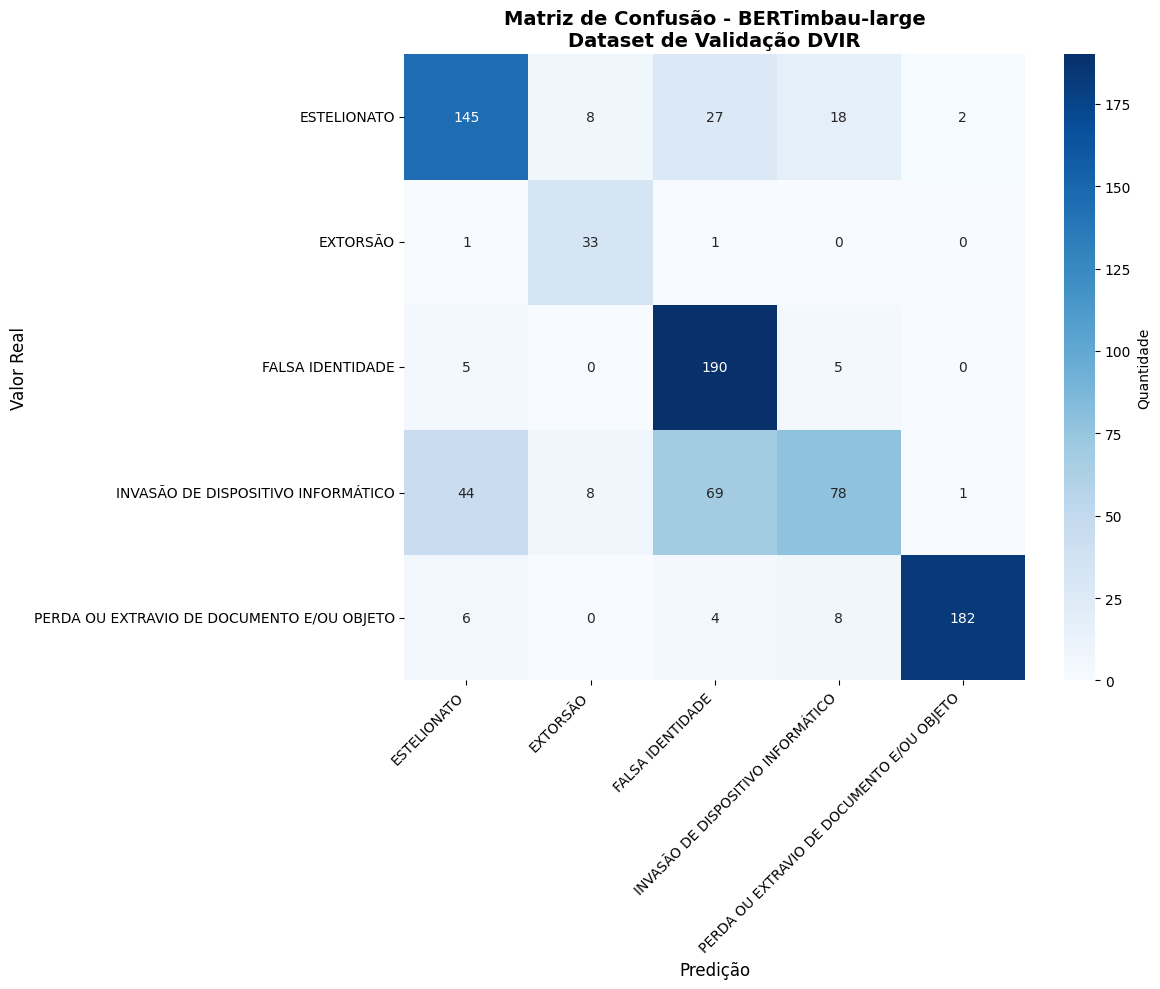

✅ Matriz de confusão salva em: matriz_confusao_bertimbau.png


In [ ]:
# Matriz de Confusão - BERTimbau
plt.figure(figsize=(12, 10))

cm_bert = confusion_matrix(y_true, y_pred_bert, labels=classes_conhecidas)

sns.heatmap(
    cm_bert,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes_conhecidas,
    yticklabels=classes_conhecidas,
    cbar_kws={'label': 'Quantidade'}
)

plt.title('Matriz de Confusão - BERTimbau-large\nDataset de Validação DVIR', fontsize=14, fontweight='bold')
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('matriz_confusao_bertimbau.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Matriz de confusão salva em: matriz_confusao_bertimbau.png')

In [ ]:
# Calcular métricas detalhadas para XLM-RoBERTa
y_pred_xlm = df_validacao_filtrado['pred_xlm'].tolist()

print('=' * 80)
print('RESULTADOS - XLM-RoBERTa-large')
print('=' * 80)

# Métricas gerais
acc_xlm = accuracy_score(y_true, y_pred_xlm)
precision_xlm, recall_xlm, f1_xlm, support_xlm = precision_recall_fscore_support(
    y_true, y_pred_xlm, average='weighted'
)

print(f'\n📊 Métricas Gerais:')
print(f'   Acurácia: {acc_xlm:.4f} ({acc_xlm*100:.2f}%)')
print(f'   Precisão: {precision_xlm:.4f}')
print(f'   Recall: {recall_xlm:.4f}')
print(f'   F1-Score: {f1_xlm:.4f}')

# Confiança média
conf_media_xlm = df_validacao_filtrado['conf_xlm'].mean()
print(f'\n🎯 Confiança Média: {conf_media_xlm:.4f} ({conf_media_xlm*100:.2f}%)')

# Relatório de classificação
print('\n📋 Relatório de Classificação:')
print(classification_report(y_true, y_pred_xlm, zero_division=0))

# Salvar métricas
metricas_xlm = {
    'Modelo': 'XLM-RoBERTa-large',
    'Acurácia': acc_xlm,
    'Precisão': precision_xlm,
    'Recall': recall_xlm,
    'F1-Score': f1_xlm,
    'Confiança Média': conf_media_xlm
}

RESULTADOS - XLM-RoBERTa-large

📊 Métricas Gerais:
   Acurácia: 0.6838 (68.38%)
   Precisão: 0.7396
   Recall: 0.6838
   F1-Score: 0.6687

🎯 Confiança Média: 0.9334 (93.34%)

📋 Relatório de Classificação:
                                            precision    recall  f1-score   support

                               ESTELIONATO       0.73      0.65      0.68       200
                                  EXTORSÃO       0.44      0.97      0.60        35
                          FALSA IDENTIDADE       0.56      0.94      0.70       200
        INVASÃO DE DISPOSITIVO INFORMÁTICO       0.75      0.28      0.41       200
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO       0.98      0.82      0.89       200

                                  accuracy                           0.68       835
                                 macro avg       0.69      0.73      0.66       835
                              weighted avg       0.74      0.68      0.67       835



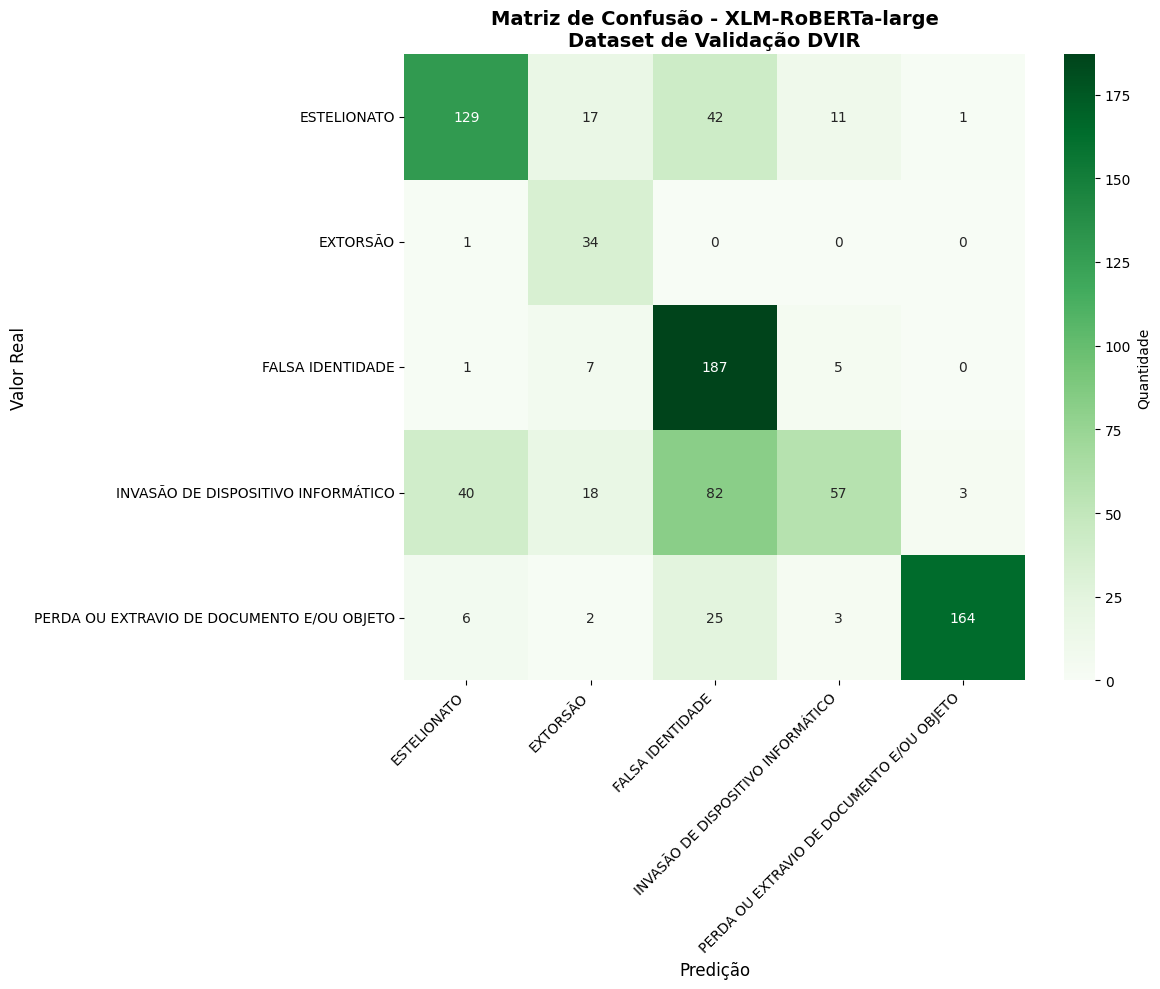

✅ Matriz de confusão salva em: matriz_confusao_xlm_roberta.png


In [ ]:
# Matriz de Confusão - XLM-RoBERTa
plt.figure(figsize=(12, 10))

cm_xlm = confusion_matrix(y_true, y_pred_xlm, labels=classes_conhecidas)

sns.heatmap(
    cm_xlm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=classes_conhecidas,
    yticklabels=classes_conhecidas,
    cbar_kws={'label': 'Quantidade'}
)

plt.title('Matriz de Confusão - XLM-RoBERTa-large\nDataset de Validação DVIR', fontsize=14, fontweight='bold')
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('matriz_confusao_xlm_roberta.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Matriz de confusão salva em: matriz_confusao_xlm_roberta.png')

In [ ]:
# Comparação lado a lado dos modelos
print('=' * 80)
print('COMPARAÇÃO FINAL - Dataset de Validação DVIR')
print('=' * 80)

# Criar DataFrame com comparação
df_comparacao_final = pd.DataFrame([metricas_bert, metricas_xlm])

print('\n📊 Tabela Comparativa:')
print(df_comparacao_final.to_string(index=False))

# Destacar o melhor modelo
print('\n🏆 VENCEDOR POR MÉTRICA:')
print(f"   Acurácia: {'BERTimbau' if acc_bert > acc_xlm else 'XLM-RoBERTa'} ({max(acc_bert, acc_xlm)*100:.2f}%)")
print(f"   Precisão: {'BERTimbau' if precision_bert > precision_xlm else 'XLM-RoBERTa'} ({max(precision_bert, precision_xlm):.4f})")
print(f"   Recall: {'BERTimbau' if recall_bert > recall_xlm else 'XLM-RoBERTa'} ({max(recall_bert, recall_xlm):.4f})")
print(f"   F1-Score: {'BERTimbau' if f1_bert > f1_xlm else 'XLM-RoBERTa'} ({max(f1_bert, f1_xlm):.4f})")
print(f"   Confiança: {'BERTimbau' if conf_media_bert > conf_media_xlm else 'XLM-RoBERTa'} ({max(conf_media_bert, conf_media_xlm)*100:.2f}%)")

# Salvar comparação em CSV
df_comparacao_final.to_csv('comparacao_modelos_validacao.csv', index=False)
print('\n💾 Comparação salva em: comparacao_modelos_validacao.csv')

COMPARAÇÃO FINAL - Dataset de Validação DVIR

📊 Tabela Comparativa:
           Modelo  Acurácia  Precisão   Recall  F1-Score  Confiança Média
  BERTimbau-large  0.752096  0.764443 0.752096  0.738906         0.928535
XLM-RoBERTa-large  0.683832  0.739601 0.683832  0.668687         0.933389

🏆 VENCEDOR POR MÉTRICA:
   Acurácia: BERTimbau (75.21%)
   Precisão: BERTimbau (0.7644)
   Recall: BERTimbau (0.7521)
   F1-Score: BERTimbau (0.7389)
   Confiança: XLM-RoBERTa (93.34%)

💾 Comparação salva em: comparacao_modelos_validacao.csv


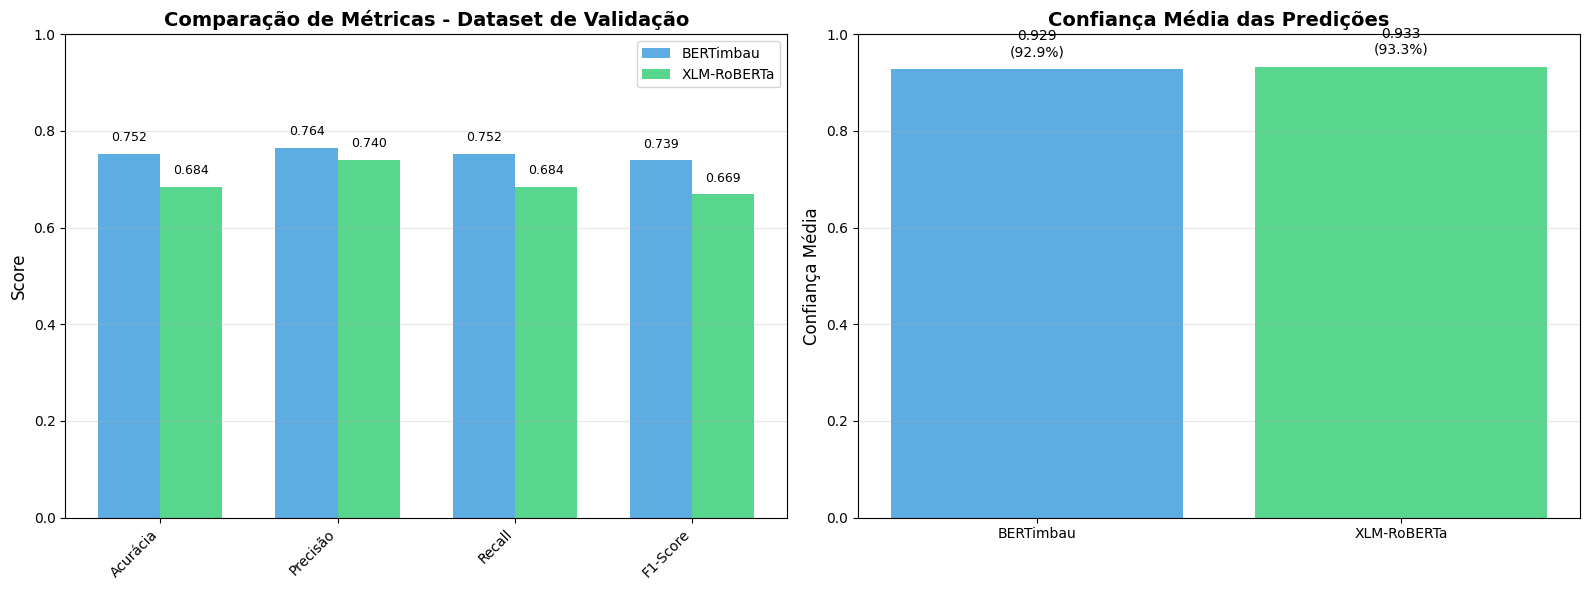

✅ Gráfico comparativo salvo em: comparacao_metricas_modelos.png


In [ ]:
# Visualização comparativa das métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Métricas principais
metricas_nomes = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
valores_bert = [acc_bert, precision_bert, recall_bert, f1_bert]
valores_xlm = [acc_xlm, precision_xlm, recall_xlm, f1_xlm]

x = np.arange(len(metricas_nomes))
width = 0.35

axes[0].bar(x - width/2, valores_bert, width, label='BERTimbau', color='#3498db', alpha=0.8)
axes[0].bar(x + width/2, valores_xlm, width, label='XLM-RoBERTa', color='#2ecc71', alpha=0.8)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Comparação de Métricas - Dataset de Validação', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metricas_nomes, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Adicionar valores nas barras
for i, v in enumerate(valores_bert):
    axes[0].text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(valores_xlm):
    axes[0].text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Confiança média
confiancas = [conf_media_bert, conf_media_xlm]
modelos = ['BERTimbau', 'XLM-RoBERTa']
cores = ['#3498db', '#2ecc71']

axes[1].bar(modelos, confiancas, color=cores, alpha=0.8)
axes[1].set_ylabel('Confiança Média', fontsize=12)
axes[1].set_title('Confiança Média das Predições', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(confiancas):
    axes[1].text(i, v + 0.02, f'{v:.3f}\n({v*100:.1f}%)', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('comparacao_metricas_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Gráfico comparativo salvo em: comparacao_metricas_modelos.png')

In [ ]:
# Análise de erros - Onde cada modelo errou
print('=' * 80)
print('ANÁLISE DE ERROS')
print('=' * 80)

# Identificar erros de cada modelo
erros_bert = df_validacao_filtrado[df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_bertimbau']]
erros_xlm = df_validacao_filtrado[df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_xlm']]

print(f'\n📉 BERTimbau:')
print(f'   Total de erros: {len(erros_bert)} de {len(df_validacao_filtrado)} ({len(erros_bert)/len(df_validacao_filtrado)*100:.2f}%)')
print('\n   Erros por classe:')
print(erros_bert['natureza_final'].value_counts())

print(f'\n📉 XLM-RoBERTa:')
print(f'   Total de erros: {len(erros_xlm)} de {len(df_validacao_filtrado)} ({len(erros_xlm)/len(df_validacao_filtrado)*100:.2f}%)')
print('\n   Erros por classe:')
print(erros_xlm['natureza_final'].value_counts())

# Casos onde ambos erraram
erros_ambos = df_validacao_filtrado[
    (df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_bertimbau']) &
    (df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_xlm'])
]

# Casos onde apenas um errou
erros_so_bert = df_validacao_filtrado[
    (df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_bertimbau']) &
    (df_validacao_filtrado['natureza_final'] == df_validacao_filtrado['pred_xlm'])
]

erros_so_xlm = df_validacao_filtrado[
    (df_validacao_filtrado['natureza_final'] == df_validacao_filtrado['pred_bertimbau']) &
    (df_validacao_filtrado['natureza_final'] != df_validacao_filtrado['pred_xlm'])
]

print(f'\n🔍 Análise Comparativa de Erros:')
print(f'   Ambos erraram: {len(erros_ambos)} casos')
print(f'   Apenas BERTimbau errou: {len(erros_so_bert)} casos')
print(f'   Apenas XLM-RoBERTa errou: {len(erros_so_xlm)} casos')
print(f'   Ambos acertaram: {len(df_validacao_filtrado) - len(erros_bert.merge(erros_xlm, how="outer"))} casos')

ANÁLISE DE ERROS

📉 BERTimbau:
   Total de erros: 207 de 835 (24.79%)

   Erros por classe:
natureza_final
INVASÃO DE DISPOSITIVO INFORMÁTICO            122
ESTELIONATO                                    55
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO     18
FALSA IDENTIDADE                               10
EXTORSÃO                                        2
Name: count, dtype: int64

📉 XLM-RoBERTa:
   Total de erros: 264 de 835 (31.62%)

   Erros por classe:
natureza_final
INVASÃO DE DISPOSITIVO INFORMÁTICO            143
ESTELIONATO                                    71
PERDA OU EXTRAVIO DE DOCUMENTO E/OU OBJETO     36
FALSA IDENTIDADE                               13
EXTORSÃO                                        1
Name: count, dtype: int64

🔍 Análise Comparativa de Erros:
   Ambos erraram: 179 casos
   Apenas BERTimbau errou: 28 casos
   Apenas XLM-RoBERTa errou: 85 casos
   Ambos acertaram: 543 casos


In [ ]:
# Salvar dataset completo com predições
df_validacao_filtrado.to_csv('validacao_com_predicoes.csv', index=False)
print('✅ Dataset com predições salvo em: validacao_com_predicoes.csv')

# Mostrar alguns exemplos de erros interessantes
print('\n' + '=' * 80)
print('EXEMPLOS DE ERROS INTERESSANTES')
print('=' * 80)

# Exemplos onde apenas BERTimbau errou
if len(erros_so_bert) > 0:
    print('\n🔴 Casos onde APENAS BERTimbau errou (XLM-RoBERTa acertou):')
    print('-' * 80)
    for idx, row in erros_so_bert.head(3).iterrows():
        print(f"Texto: {row['Descrição do Fato'][:150]}...")
        print(f"Real: {row['natureza_final']}")
        print(f"BERTimbau: {row['pred_bertimbau']} (conf: {row['conf_bertimbau']:.2%})")
        print(f"XLM-RoBERTa: {row['pred_xlm']} (conf: {row['conf_xlm']:.2%}) ✓")
        print('-' * 80)

# Exemplos onde apenas XLM-RoBERTa errou
if len(erros_so_xlm) > 0:
    print('\n🔴 Casos onde APENAS XLM-RoBERTa errou (BERTimbau acertou):')
    print('-' * 80)
    for idx, row in erros_so_xlm.head(3).iterrows():
        print(f"Texto: {row['Descrição do Fato'][:150]}...")
        print(f"Real: {row['natureza_final']}")
        print(f"BERTimbau: {row['pred_bertimbau']} (conf: {row['conf_bertimbau']:.2%}) ✓")
        print(f"XLM-RoBERTa: {row['pred_xlm']} (conf: {row['conf_xlm']:.2%})")
        print('-' * 80)

# Exemplos onde ambos erraram
if len(erros_ambos) > 0:
    print('\n🔴 Casos onde AMBOS erraram:')
    print('-' * 80)
    for idx, row in erros_ambos.head(3).iterrows():
        print(f"Texto: {row['Descrição do Fato'][:150]}...")
        print(f"Real: {row['natureza_final']}")
        print(f"BERTimbau: {row['pred_bertimbau']} (conf: {row['conf_bertimbau']:.2%})")
        print(f"XLM-RoBERTa: {row['pred_xlm']} (conf: {row['conf_xlm']:.2%})")
        print('-' * 80)

✅ Dataset com predições salvo em: validacao_com_predicoes.csv

EXEMPLOS DE ERROS INTERESSANTES

🔴 Casos onde APENAS BERTimbau errou (XLM-RoBERTa acertou):
--------------------------------------------------------------------------------
Texto: Minha compra foi realizada no dia 07 de agosto. Recentemente, adquiri dois capacetes de cnpj 07754689000199 que esta localizada no rio de janeiro   lo...
Real: ESTELIONATO
BERTimbau: FALSA IDENTIDADE (conf: 43.40%)
XLM-RoBERTa: ESTELIONATO (conf: 98.66%) ✓
--------------------------------------------------------------------------------
Texto: Eu fui fazer uma recarga de um jogo online e não percebi que o site original foi clonado por um site falso, onde cai no golpe do Pix e não recebi o qu...
Real: ESTELIONATO
BERTimbau: INVASÃO DE DISPOSITIVO INFORMÁTICO (conf: 71.74%)
XLM-RoBERTa: ESTELIONATO (conf: 98.61%) ✓
--------------------------------------------------------------------------------
Texto: Uma cliente chamada Mayra Fernanda fez uma compra